<center>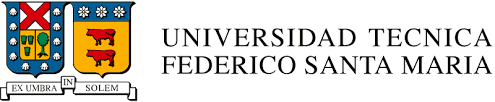</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor

# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [190]:
# from google.colab import files
# files.upload()

In [191]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [192]:
# !kaggle datasets download -d rajyellow46/wine-quality

In [193]:
# !unzip /content/wine-quality.zip

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?
    
> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)




In [3]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> a) Se observa que el tipo de vino corresponde a una variable categórica, mientras que el resto de las variables corresponde a variables numéricas.

> b) En cuanto a los datos faltantes, se observan varios registros con datos tipo NaN, lo que indica que esos datos no están disponibles, por lo que sí hay datos faltantes y se muestran en la siguiente tabla:

In [40]:
nan_columns = df.columns[df.isna().any()] 
nan_counts = df[nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table = pd.DataFrame({'Atributo con registros vacíos': nan_columns,
                          'Número de registros vacíos': nan_counts})


# Print the NaN table
print(nan_table)

                 Atributo con registros vacíos  Número de registros vacíos
fixed acidity                    fixed acidity                          10
volatile acidity              volatile acidity                           8
citric acid                        citric acid                           3
residual sugar                  residual sugar                           2
chlorides                            chlorides                           2
pH                                          pH                           9
sulphates                            sulphates                           4


                 Atributo con registros vacíos  Número de registros vacíos
fixed acidity                    fixed acidity                          10
pH                                          pH                           9
volatile acidity              volatile acidity                           8
sulphates                            sulphates                           4
citric acid                        citric acid                           3
residual sugar                  residual sugar                           2
chlorides                            chlorides                           2


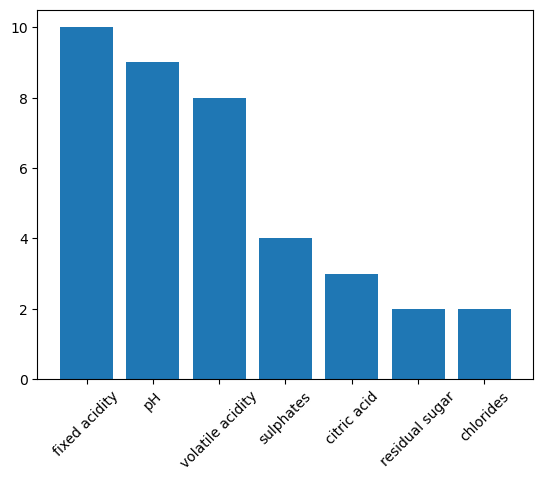

In [53]:

nan_table_sorted = nan_table.sort_values(by='Número de registros vacíos', ascending=False)
fig = plt.subplot()
#fig.set_figwidth(10,6)
fig.bar(nan_table_sorted['Atributo con registros vacíos'] , nan_table_sorted['Número de registros vacíos'])
ax.set_title("Cantidad de registros vacíos por atributo")
ax.set_xlabel("Atributo")
ax.set_ylabel("Registros vacíos")
plt.xticks(rotation=45)
plt.show()



> c) A continuación se enumeran las técnicas investigadas:
>   >1) Si el dataset contiene numerosas filas con registros desconocidos o vacíos, entonces una opción es eliminar esas columnas, pues podrían considerarse como datos no válidos o no representativos de la situación que se desea capturar para entrenar el modelo.
>   >2) Si alguna "feature" en particular muestra gran catidad de registros vacíos, entonces una opción es entrenar al modelo sin la feature problemática, pues esa feature no está bien representada en el registro de datos para el dataset.
>   >3) Mean/median imputation: Consiste en, si el dataset muestra un número reducido de valores desconocidos, reemplazar los valores por la media o mediana (según sea el caso más representativo de la situación) del atributo o feature. Esta técnica asume que la pérdida de datos atiende a procesos completamente aleatorios (MCAR, "missinf completely at random"; por sus siglás en inglés) o a proceso aleatorios (MAR).
>   >4) Otra opción es estimar los datos mediante algún método de regressión o clasificación, conviertiendo estas features en target del modelo.



In [197]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?




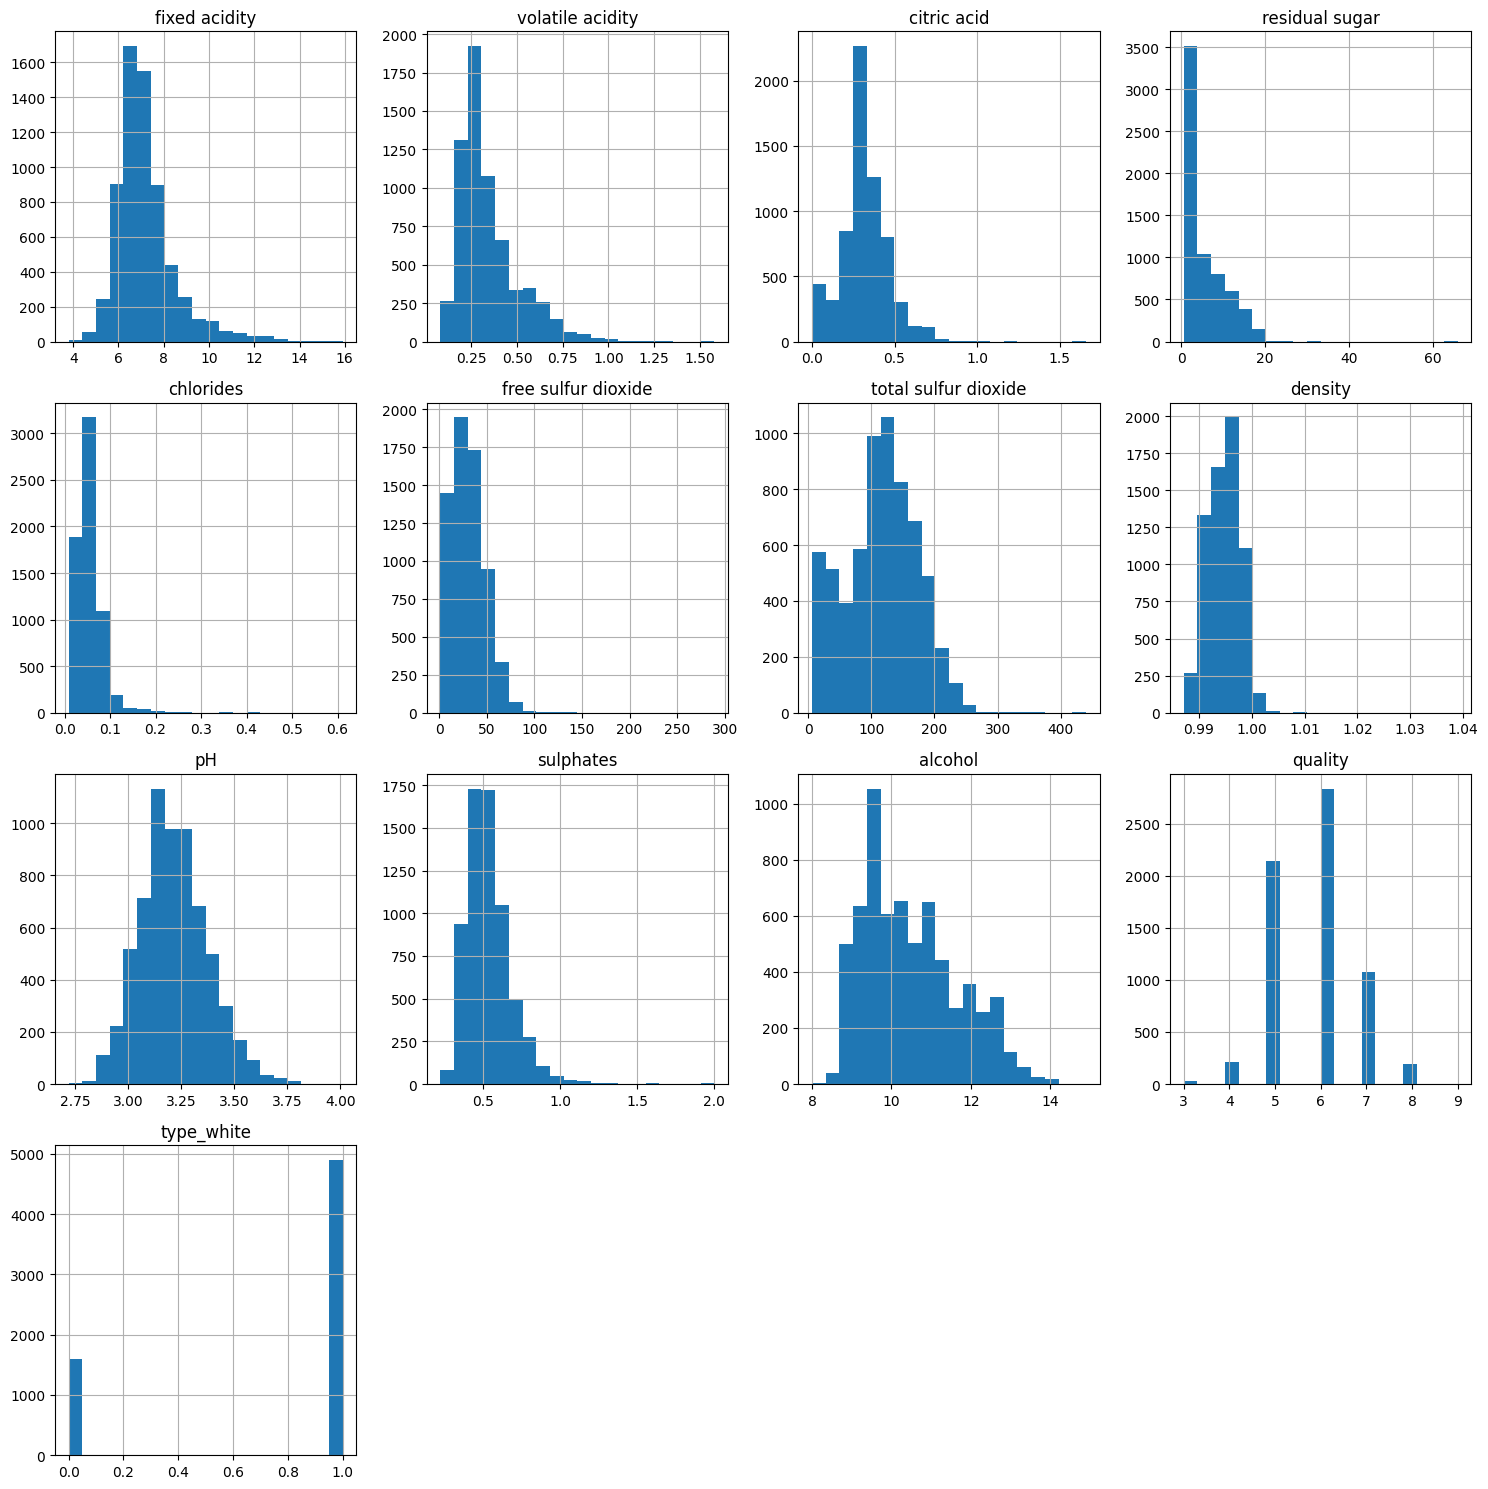

In [286]:
df = pd.get_dummies(df,drop_first=True)
df.hist(figsize=(15, 15), layout=(4, 4), bins=20)
plt.tight_layout()
plt.show()

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
type_white               Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

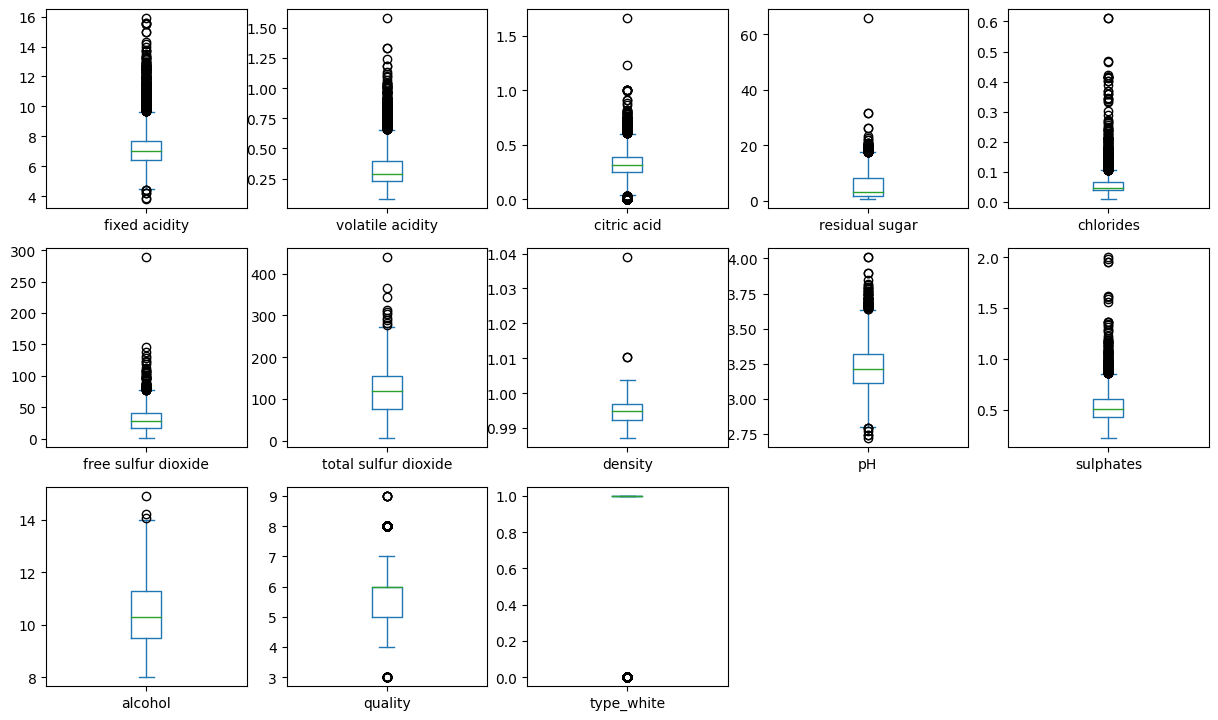

In [287]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

<Axes: >

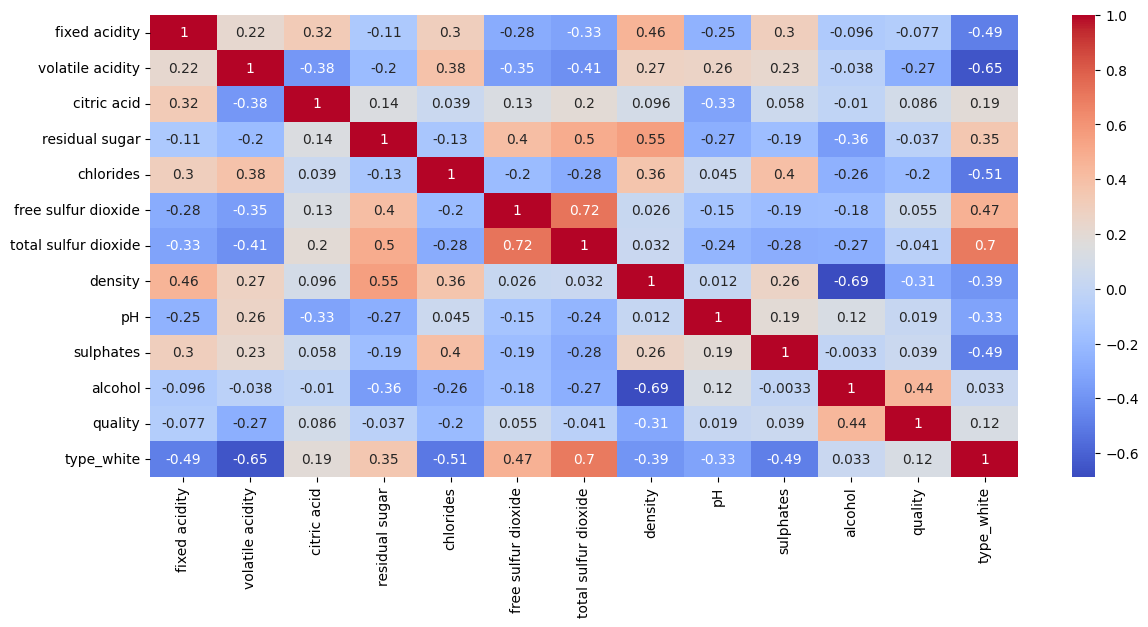

In [288]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

> a) Se observa que cada feature sigue una distribución distinta, marcada bastante por los valores extremos de cada uno. Lo anterior se observa en el histograma pero con mayor razón se observa en el diagrama de cajas.

> b) De acuerdo a lo expuesto, es visible que existe un *desbalance* en la distribución de los valores de las features.

> c) Hay varios aspectos en los que el *desbalance* puede afectar el desempeño de una predicción, a continuación se describen algunos:
>   >1) El bias del modelo se puede ver afectado por la dominancia de las instancias más numerosas en el dataset.
>   >2) Las métricas para evaluar el desempeño del modelo se podrían ver afectadas, por ejemplo, el *accurracy* podría verse afectado si el predictor tiene un alto índice de predicciones sobre la clase mayoritaria, aún cuando el modelo prediga erróneamente los datos extremos. Lo anterior vuelve más complejo la evaluación del desempeño de un predictor.
>   >3) Si el dataset muestra un *desbalance*, podría ser indicativo que su data es poco reprensentativa, induciendo *overfitting* al modelo, ajustando la predicción a los datos con mayor presencia y empobreciendo la capacidad de generalización del modelo.


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

In [289]:
X = df.drop(['quality'], axis =1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [290]:
# Checking which columns have empty values
empty_columns = df.columns[df.isnull().any()].tolist()

# Create a table showing columns with empty values
empty_columns_table = pd.DataFrame({'Columns with Empty Values': empty_columns})

print(empty_columns_table)


  Columns with Empty Values
0             fixed acidity
1          volatile acidity
2               citric acid
3            residual sugar
4                 chlorides
5                        pH
6                 sulphates


In [291]:
# To check the process, the mean values before and after doing the replacement should be the same
column_means_before = X_train[empty_columns].mean()

# Replacing the NaN values of the df for the mean value of its column
for column in X_train.columns:
    if X_train[column].isna().any():
        column_mean = X_train[column].mean()
        X_train[column].fillna(column_mean, inplace=True)
# Mean value after doing the replacement
column_means_after = X_train[empty_columns].mean()

#Checking the comparisson
comparison_X = pd.DataFrame({'Column Means (Before)': column_means_before,
                              'Column Means (After)': column_means_after})

# Print the comparison DataFrame
print(comparison_X)


                  Column Means (Before)  Column Means (After)
fixed acidity                  7.219717              7.219717
volatile acidity               0.337248              0.337248
citric acid                    0.320780              0.320780
residual sugar                 5.485505              5.485505
chlorides                      0.055947              0.055947
pH                             3.217727              3.217727
sulphates                      0.532251              0.532251


> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

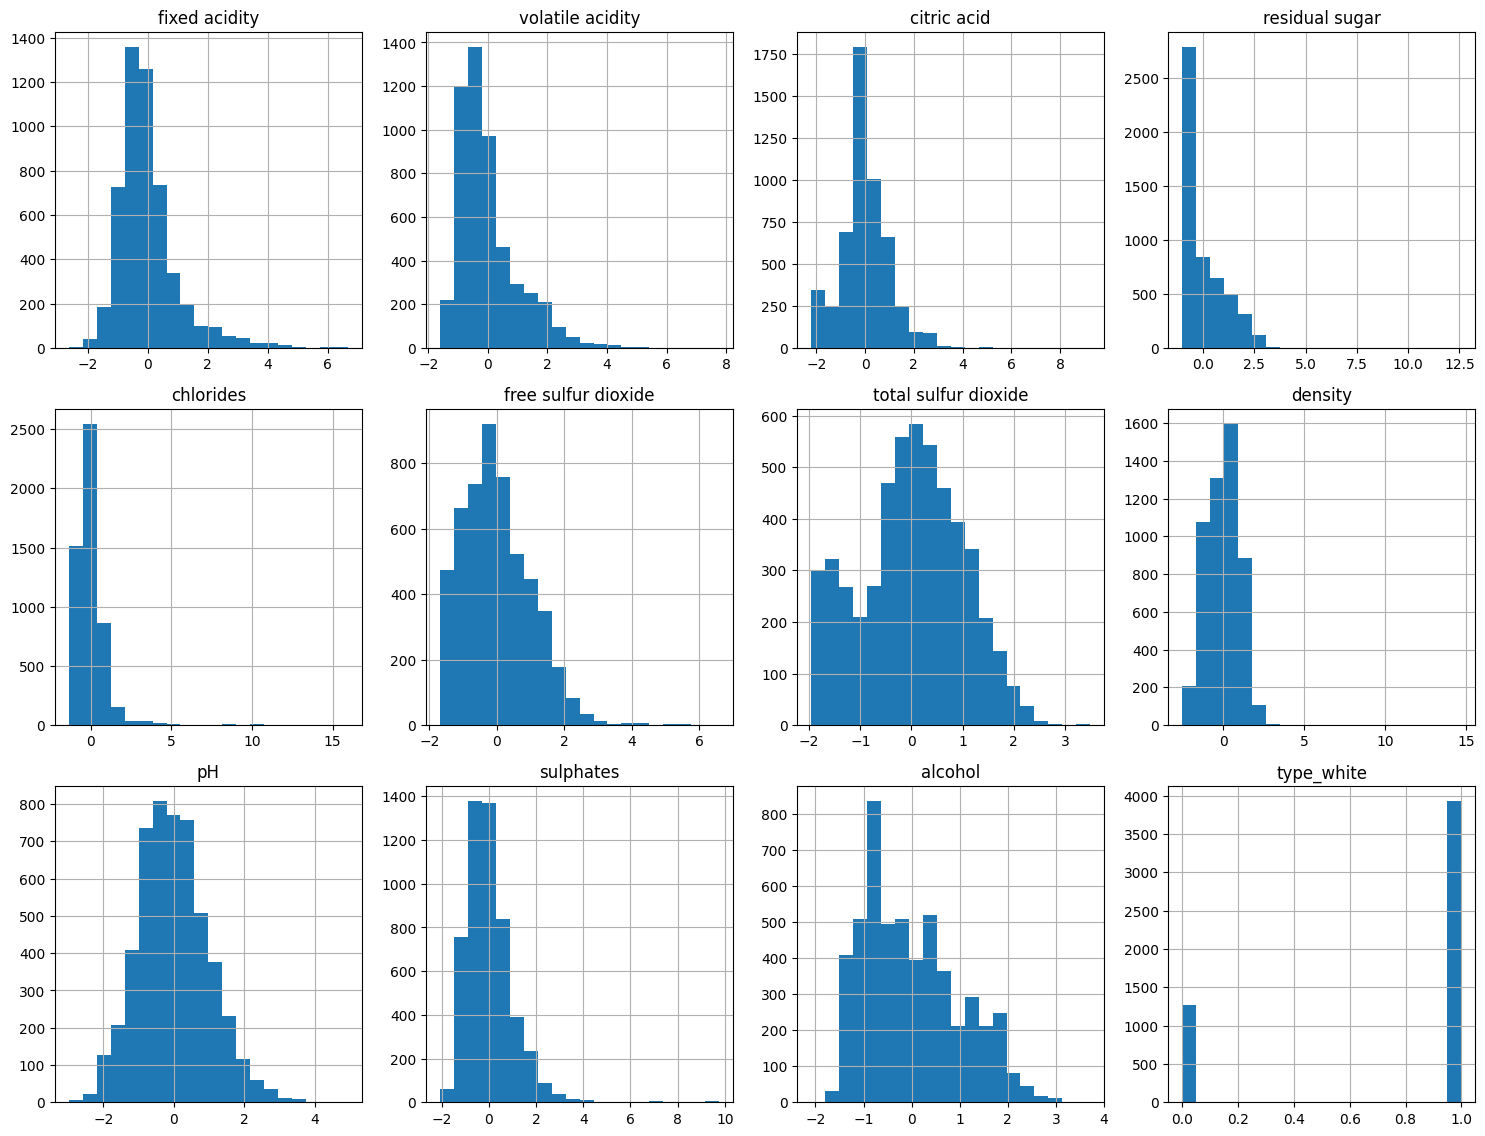

In [293]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

cols_to_normalize = [col for col in X_train.columns if len(df[col].unique()) > 2]

for col in cols_to_normalize:
    X_train[col] = X_scaler.fit_transform(X_train[[col]])

X_train.hist(figsize=(15, 15), layout=(4, 4), bins=20)
plt.tight_layout()
plt.show()

e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

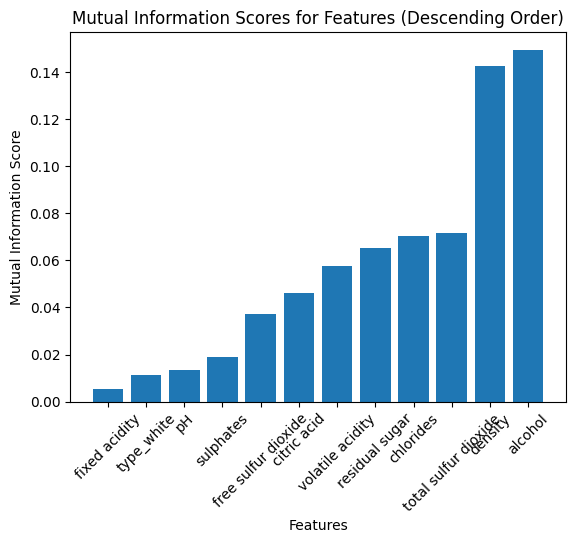

In [294]:
mi_scores = mutual_info_classif(X_train, y_train)
df_mi_scores = pd.DataFrame({'Features': X.columns, 'MI Scores': mi_scores})
df_mi_scores = df_mi_scores.sort_values(by='MI Scores', ascending=True)
# Create a bar plot of feature names and MI scores
fig, ax = plt.subplots()
ax.bar(df_mi_scores['Features'], df_mi_scores['MI Scores'])
ax.set_xlabel('Features')
ax.set_ylabel('Mutual Information Score')
ax.set_title('Mutual Information Scores for Features (Descending Order)')
plt.xticks(rotation=45)
plt.show()


> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

In [308]:
A_X = df.drop(['quality'], axis =1)
A_y = df['quality']

A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(A_X, A_y, test_size=0.2, shuffle=True)

for column in A_X_train.columns:
    if A_X_train[column].isna().any():
        column_mean = A_X_train[column].mean()
        A_X_train[column].fillna(column_mean, inplace=True)


def B_set(A_X,A_y,n):
    cols_to_eliminate = df_mi_scores.head(n)['Features'].tolist()
    # print(f"Features with the {n} lowest MI scores: {cols_to_eliminate}")
    B_X = A_X
    for col in cols_to_eliminate:
        B_X = B_X.drop([col], axis =1)
    B_y = A_y
    B_X_train, B_X_test, B_y_train, B_y_test = train_test_split(B_X, B_y, test_size=0.2, shuffle=True)

    for column in B_X_train.columns:
        if B_X_train[column].isna().any():
            column_mean = B_X_train[column].mean()
            B_X_train[column].fillna(column_mean, inplace=True)

    return B_X, B_y, B_X_train, B_X_test, B_y_train, B_y_test

############## Number of columns to eliminate ################
# n_lowest_mi = 3
# B_X, B_y, B_X_train, B_X_test, B_y_train, B_y_test = B_set(A_X,A_y, n_lowest_mi)

## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma: 

Determinando el número de features a eliminar usando LinearRegression

In [309]:
estimator = LinearRegression()
mse_min = float('inf')
r2_max = -float('inf')

for n in range(A_X.shape[1]-1):
    B_X, B_y, B_X_train, B_X_test, B_y_train, B_y_test = B_set(A_X,A_y, n)
    estimator.fit(B_X_train, B_y_train)
    y_pred = estimator.predict(B_X_train)
    mse = mean_squared_error(B_y_train, y_pred)
    r2 = r2_score(B_y_train, y_pred)

    if r2 > r2_min:
        print('r2 of n='+str(n)+':'+str(r2))
        r2_min = r2
        n_sel_r2 = n

    if mse < mse_min:
        print('MSE of n='+str(n)+':'+str(mse))
        mse_min = mse
        n_sel_mse = n
        
print('n_r2: '+str(n_sel_r2), 'n_mse: '+str(n_sel_mse))

r2 of n=0:0.2996531815624168
MSE of n=0:0.5209756809464221
n_r2: 0 n_mse: 0


Se determinó que óptimamente no se deberían eliminar features para minimizar la deficiencia del predictor sobre el conjunto de entrenamiento

In [328]:
# Define the model and the hyperparameter grid

cv_folds=KFold(n_splits=5, shuffle=True)


estimator = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=500, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )
# hypereg.fit(A_X_train, A_y_train.ravel())

# Fit the data to perform grid search
for n in range(A_X.shape[1]-1):
    B_X, B_y, B_X_train, B_X_test, B_y_train, B_y_test = B_set(A_X,A_y, n)
    hypereg.fit(B_X_train, B_y_train.ravel())



c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before converg

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=500),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

In [329]:
#hypereg.best_score_


-1.252691601632135e+16

In [330]:

y_pred_reg = hypereg.predict(A_X_train)
# y_pred_reg = y_scaler.inverse_transform(y_pred_reg)
mse_reg = mean_squared_error(A_y_train, y_pred_reg)
r2_reg = r2_score(A_y_train,y_pred_reg)
print('Error cuadrático medio: ', mse_reg)
print('Coeficiente de correlación: ', r2_reg)


Error cuadrático medio:  5.948047829273118e+16
Coeficiente de correlación:  -7.885225436589179e+16


In [ ]:


# Access the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", best_params)
print("Best Score (MSE):", best_score)



pd.DataFrame(hypereg.cv_results_)

print(hypereg.best_params_)


X_test.head()
y_pred_reg = hypereg.predict(X_test)
y_pred_reg = y_scaler.inverse_transform(y_pred_reg.reshape(-1,1))


mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test,y_pred_reg)
print('Error cuadrático medio: ', mse_reg)
print('Coeficiente de correlación: ', r2_reg)



plt.figure()
plt.scatter(y_test, y_pred_reg, label='Predicciones')
plt.scatter(y_test, y_test, label='Valores correctos')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')
plt.legend()


plt.show()


Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El parámetro max_depth se utiliza para especificar la profundidad máxima que se probará en el arbol en la búsqueda, donde la profundidad corresponde al máximo camino entre la raiz del arbol y una hoja. Al establecer una profunidad máxima se busca evitar un arbol muy complejo y con ello, evitar el _overfitting_.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El parámetro max_leaf_nodes 

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



In [57]:




#model1 = DecisionTreeRegressor(...)
#model1.fit(X_train,y_train)

NameError: name 'A_X_train' is not defined

In [ ]:
y_pred = y_scaler.inverse_transform(np.array(model1.predict(X_test)).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

> c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [ ]:
model2 = RandomForestRegressor(random_state=0)
model2.fit(X_train,y_train)

In [ ]:
y_pred = y_scaler.inverse_transform(np.array(model2.predict(X_test)).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [ ]:
model3 = BaggingRegressor(...)
model3.fit(X_train,y_train)

In [ ]:
y_pred = y_scaler.inverse_transform(np.array(model3.predict(X_test)).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor

In [5]:
import os

path_ = os.path.abspath('Enunciado_Tarea_2.ipynb')
data_path_ = os.path.join(os.path.dirname(path_), "preg2\\")

data_path_

for dirname, _, filenames in os.walk(data_path_): 
     for filename in filenames:
         print(os.path.join(dirname, filename))

In [6]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [7]:
#path_datatest = os.path.abspath('test')
#path_datatrain = os.path.abspath('train')

path_ = os.path.abspath('Enunciado_Tarea_2.ipynb')
data_path_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\")
data_trainpath_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\")
data_testpath_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\test\\Inertial_Signals\\")

train_paths = [data_trainpath_ + signal + 'train.txt' for signal in SIGNALS]
test_paths = [data_testpath_  + signal + 'test.txt' for signal in SIGNALS]

train_paths
#test_paths

['C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_x_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_y_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_z_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_x_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_y_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_z_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\Programs\\Microsoft VS Code\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\total_acc_x_train.txt',
 'C:\\Users\\carva\\AppData\\Local\\P

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [5]:

def __load_X(X_signal_paths):
    n_samples = len(X_signal_paths) #cantidad de muestras 
    X_signals = []  
    for x in X_signal_paths:
        data = np.loadtxt(x)
        X_signals.append(data)

    return np.transpose(np.array(X_signals), (1, 2, 0))


In [6]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

9
9


In [7]:
print(x_train[:,0,0])

[ 1.808515e-04  1.093752e-03  3.531266e-03 ... -2.267175e-01 -6.480597e-02
 -1.944707e-01]


In [8]:
print(x_train[0,:,0])

[ 1.808515e-04  1.013856e-02  9.275574e-03  5.065897e-03  1.081025e-02
  4.045101e-03  4.757375e-03  6.213647e-03  3.306744e-03  7.571941e-03
  5.407117e-03  6.221276e-03  6.895028e-03  4.610260e-03  7.331333e-03
  5.077667e-03  5.762556e-03  6.692748e-03  5.443238e-03  8.240952e-03
  6.506451e-03  6.531523e-03  7.422441e-03  5.771769e-03  6.240187e-03
  4.622982e-03  4.832962e-03  5.498746e-03  4.341186e-03  5.098018e-03
  4.268742e-03  3.045187e-03  3.204192e-03  4.520400e-03  5.127211e-03
  3.549791e-03  4.234233e-03  4.468670e-03  3.572702e-03  5.136278e-03
  5.379786e-03  4.408520e-03  2.244039e-03 -1.183598e-03 -6.795342e-04
  2.281389e-03  3.653728e-03  2.312639e-03 -4.042194e-05  5.342254e-04
  2.963263e-03  4.399468e-03  2.702339e-03  3.452310e-04  2.916911e-03
  4.978556e-03  3.446870e-03  4.378151e-03  5.006170e-03  1.996795e-03
 -4.718596e-04 -7.555679e-04 -1.528170e-03 -2.391153e-03  1.093752e-03
  4.550077e-03  2.879173e-03  2.247428e-03  3.304683e-03  2.415886e-03
  1.61

In [7]:
np.shape(x_train)

(7352, 128, 9)

> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [8]:
trn_pth_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\train\\y_train.txt")
tst_pth_= os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\test\\y_test.txt")
y_train = np.loadtxt(trn_pth_,  dtype=np.int32)
y_test = np.loadtxt(tst_pth_, dtype=np.int32)



In [9]:
y_test
y_train

array([5, 5, 5, ..., 2, 2, 2])

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

    Tanto para el conjunto de entrenamiento y de test quedan nueve experimentos en los datos de entrada que corresponden a la cantidad de archivos .txt que registran la aceleración en los distintos ejes (xyz)

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

    Se obtienen dimensiones de 7352, 128 y 9 respectivamente.

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.




> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

In [ ]:
# 2.1.2 - C



In [10]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [11]:
np.shape(x_train) #Elimino indice de archivo

(7352, 1152)

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [12]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [13]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

> b) ¿Estan bien balanceadas las clases?

C:\Users\Lucas\AppData\Local\Temp\ipykernel_15444\1447763567.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(LABELS, rotation=45)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_15444\1447763567.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(LABELS, rotation=45)


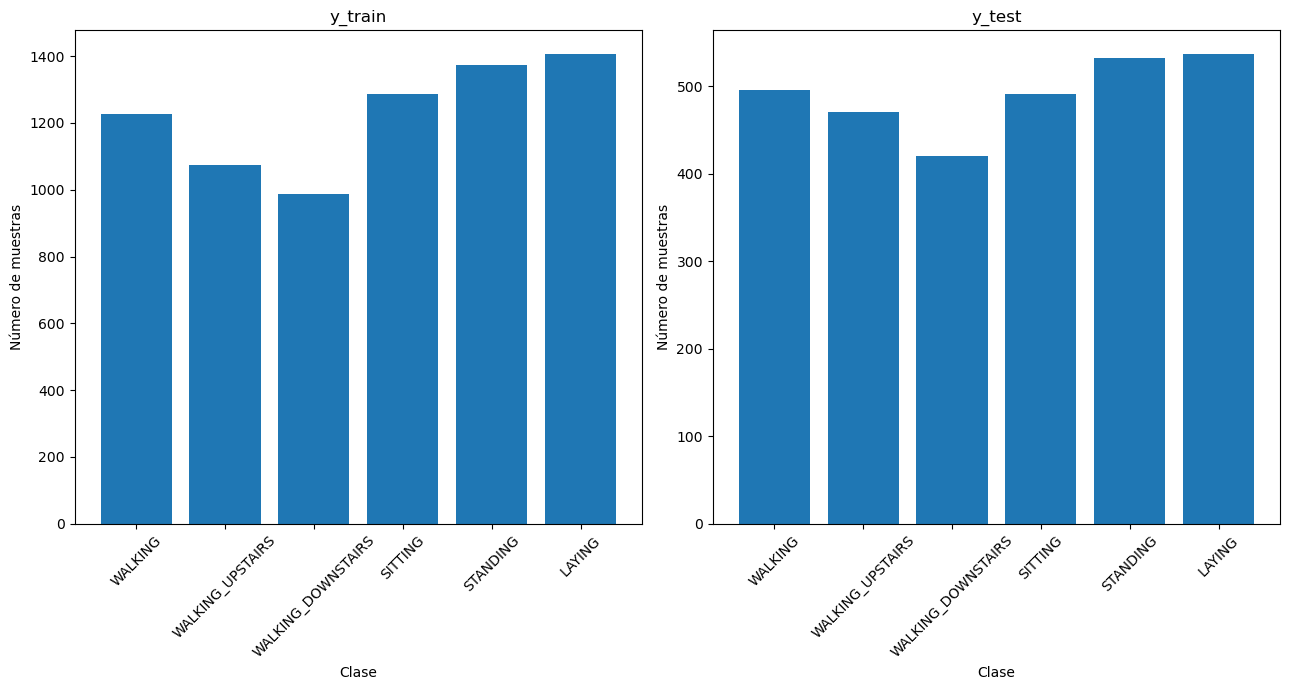

In [30]:
# grafica que cuente cuantos 1 hay en cada columna de y_train_OHE


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

ax1.bar(LABELS, y_train_OHE.sum(axis=0))
ax1.set_title("y_train")
ax1.set_xlabel("Clase")
ax1.set_ylabel("Número de muestras")
ax1.set_xticklabels(LABELS, rotation=45)

ax2.bar(LABELS, y_test_OHE.sum(axis=0))
ax2.set_title("y_test")
ax2.set_xlabel("Clase")
ax2.set_ylabel("Número de muestras")
#ax2.set_xticks(np.arange(0, 2000, 500))
ax2.set_xticklabels(LABELS, rotation=45)

plt.tight_layout()

plt.show()

#plt.bar(LABELS, y_train_OHE.sum(axis=0))
# plt.title("Número de muestras por clase para y_train")
# plt.xlabel("Clase")
# plt.ylabel("Número de muestras")
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(12, 8))
# plt.bar(LABELS, y_test_OHE.sum(axis=0))
# plt.title("Número de muestras por clase para y_test")
# plt.xlabel("Clase")
# plt.ylabel("Número de muestras")
# plt.xticks(rotation=45)
# plt.show()


> c) Estandarice los atributos con media 0 y variaza 1.

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

    La red neuronal feedforward se entrena a partir de dos conceptos principales: forward propagation y backpropagation.
    
    Forward propagation consiste en ingresar los datos de entrada del conjunto de entrenamiento a la red para obtener los datos de salida y con ello utilizar métricas de error tal como la función de péridda o el MSE (comparando con los target reales del training set).

    A partir de los errores obtenidos, se realiza brackpropagation que consiste en propagar el error desde la output layer hasta la input layer secuencialmente, para esto se utiliza la derivada de la métrica del error respecto a los pesos existente entre las neuronas de las distintas capas de la red.

    Luego a partir del error propagado desde la output layer hasta la input layer se actualizan los pesos a partir de las derivadas calculadas anteriormente


> b) ¿Qué es una neurona en este contexto?




> c) ¿Qué es una función de activación y para que sirven?

    La función de activación es una función no lineal que se aplica a la combinación lineal de las entradas de una neurona. Se utiliza con al finalidad de modelar de una forma no lineal el comportamiento de los datos de entrada y así, complejizar el modelo de redes neuronales. Las tres funciones de activación principales corresponden a la función sigmoide, la función Relu y la función tanh (tangente hiperbólica).

> d) ¿A qué se le llama capa densa?

    Una capa densa es una capa en la que todas sus neuronas están conectadas con todas las neuronas de la capa anterior y posterior. Es decir, cada neurona tiene una conexión con todas las neurona de las capas adyacentes. 

    Con ello, cada neurona de la capa densa recibe como entrada todas las neuronas de la capa anterior. Así como cada neurona de la capa posterior recibirá como entrada la combinación lineal de todas las neuronas de la capa densa (más la función de activación).


> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

    La output layer debería contar con seis neuronas, una asociada para cada target. Donde cada neurona deberá indicar si se está realizando dicha actividad o no.


> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [1]:
#Importando librerías para el modelo


from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.activations import tanh, sigmoid, relu, softmax
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy, accuracy
from keras.callbacks import EarlyStopping



In [38]:
input_layer = Input(shape = (x_train.shape[1:])) #Defino input layer

# Modelo solo con input y output layer.

output_layer = Dense(units=6, activation=softmax)(input_layer) # Output layer. Función de activación softmax para clasificación multiclase

ANN_1 = Model(inputs = input_layer , outputs = output_layer) # Modelo solo con input y output layer

# Segundo modelo, input layer, hidden layer (32, tanh) y output layer

layer_2 = Dense(units=32, activation=tanh)(input_layer)
output_layer_2 = Dense(units=6, activation=softmax)(layer_2) # Output layer. Función de activación softmax para clasificación multiclase
ANN_2 = Model(inputs = input_layer , outputs = output_layer_2) # Modelo solo con input, 1 hidden layer y output layer

# Tercer modelo, con input layer, hidden_layyer(32,sigmoid) y output layer
layer_3 = Dense(units=32, activation=sigmoid)(input_layer)
output_layer_3 = Dense(units=6, activation=softmax)(layer_3) # Output layer. Función de activación softmax para clasificación multiclase
ANN_3 = Model(inputs = input_layer , outputs = output_layer_3) # Modelo solo con input, 1 hidden layer y output layer

# Cuarto modelo, con input layer, hidden_layer(32,relu) y output layer
layer_4 = Dense(units=32, activation=relu)(input_layer)
output_layer_4 = Dense(units=6, activation=softmax)(layer_4) # Output layer. Función de activación softmax para clasificación multiclase
ANN_4 = Model(inputs = input_layer , outputs = output_layer_4) # Modelo solo con input, 1 hidden layer y output layer

# layer_1 = Dense(units=16, activation=relu)(input_layer) 
# layer_2 = Dense(units=64, activation=relu)(layer_1)
# layer_3 = Dense(units=32, activation=relu)(layer_2)
# layer_4 = Dense(units=16, activation=relu)(layer_3)
# layer_5 = Dense(units=8, activation=relu)(layer_4)
# output_layer = Dense(units=6, activation=softmax)(layer_1) # Output layer

# ANN = Model(inputs = input_layer , outputs = output_layer) # Modelo solo con input, 1 hidden layer y output layer



In [39]:
#printeo summary de los modelos
print(' ')
print('Modelo con solo input y output layer')
print('')
ANN_1.summary()
print(' ')
print('Modelo con input layer, hidden layer (32, tanh) y output layer')
print(' ')
ANN_2.summary()

print(' ')
print('Modelo con input layer, hidden layer (32, sigmoid) y output layer')
print(' ')
ANN_3.summary()

print(' ')
print('Modelo con input layer, hidden layer (32, relu) y output layer')
print(' ')
ANN_4.summary()


 
Modelo con solo input y output layer

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense (Dense)               (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________
 
Modelo con input layer, hidden layer (32, tanh) y output layer
 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                36896     
 

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

        Dado a que se trata de un problema de clasificación

* ¿Qué es la paciencia en este contexto?

        La paciencia en este contexto establece cuantos epochs sin mejorar el modelo se esperan antes de que se detenga el entrenamiento. Con mejorar se refiere a cuando no disminuye la métrica de error utilizada para monitorear el desempeño de la red neuronal 

* ¿Para qué se usa el parámetro min_delta?

        El parámetro min_delta corresponde a el menor cambio en la métrica de error utilizada tal que esta cuente como una mejora en el modelo de red neuronal al entrenarla. Si la disminución de la métrica de error es mayor a min_delta, se interpreta como una mejora, y viceversa, si es menor a min_delta, entonces el modelo no mejora y con ello se tiene un _epoch_ sin mejora en el modelo para el argumento de paciencia.
    

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',mode='max', verbose=1, patience=50) #Defino early_stop por el accuracy
ANN_1.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy, 'accuracy'])

ANN_2.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy,'accuracy'])

ANN_3.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy,'accuracy'])

ANN_4.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy,'accuracy'])


> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [41]:
history_1 = ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop]) # Entrenamiento del modelo 1 con early_stop

history_2 = ANN_2.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 2 con early_stop

history_3 = ANN_3.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 3 con early_stop

history_4 = ANN_4.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 4 con early_stop


Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 1.5263 - categorical_accuracy: 0.4749 - accuracy: 0.4749 - val_loss: 1.3144 - val_categorical_accuracy: 0.5625 - val_accuracy: 0.5625
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.2658 - categorical_accuracy: 0.5617 - accuracy: 0.5617 - val_loss: 1.2146 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1714 - categorical_accuracy: 0.5789 - accuracy: 0.5789 - val_loss: 1.1708 - val_categorical_accuracy: 0.5693 - val_accuracy: 0.5693
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1124 - categorical_accuracy: 0.5875 - accuracy: 0.5875 - val_loss: 1.1428 - val_categorical_accuracy: 0.5598 - val_accuracy: 0.5598
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 1.0720 - categorical_accuracy: 0.5969 - accuracy: 0.5969 - val_loss: 1.1174 - val_categorical_accu

In [42]:
print('val_acurracy modelo 1 :', history_1.history['val_accuracy'][-1]) # Accuracy del modelo 1
print('val_acurracy modelo 2 :', history_2.history['val_accuracy'][-1]) # Accuracy del modelo 2
print('val_acurracy modelo 3 :', history_3.history['val_accuracy'][-1]) # Accuracy del modelo 3
print('val_acurracy modelo 4 :', history_4.history['val_accuracy'][-1]) # Accuracy del modelo 4



val_acurracy modelo 1 : 0.5665760636329651
val_acurracy modelo 2 : 0.8505434989929199
val_acurracy modelo 3 : 0.779891312122345
val_acurracy modelo 4 : 0.91576087474823


> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [43]:
input_layer = Input(shape = (x_train.shape[1:])) #Defino input layer
new_layer_1 = Dense(units=64, activation=relu)(input_layer)
new_layer_12 = Dense(units=32, activation=relu)(new_layer_1)
new_output_layer1 = Dense(units=6, activation=softmax)(new_layer_12) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_1 = Model(inputs = input_layer , outputs = new_output_layer1) # Modelo solo con input, 1 hidden layer y output layer

new2_layer = Dense(units=128, activation=relu)(input_layer)
new2_layer_2 = Dense(units=64, activation=relu)(new2_layer)
new2_layer_3 = Dense(units=32, activation=relu)(new2_layer_2)
new2_output_layer = Dense(units=6, activation=softmax)(new2_layer_3) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_2 = Model(inputs = input_layer , outputs = new2_output_layer) # Modelo solo con input, 1 hidden layer y output layer

new3_layer = Dense(units=256, activation=relu)(input_layer)
new3_layer_2 = Dense(units=128, activation=relu)(new3_layer)
new3_layer_3 = Dense(units=64, activation=relu)(new3_layer_2)
new3_layer_4 = Dense(units=32, activation=relu)(new3_layer_3)
new3_output_layer = Dense(units=6, activation=softmax)(new3_layer_4) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_3 = Model(inputs = input_layer , outputs = new3_output_layer) # Modelo solo con input, 1 hidden layer y output layer



In [44]:
print(' ')
print('Modelo con solo input y output layer')
print('')
new_ANN_1.summary()
print(' ')
print(' ')
print(' ')
print('Modelo con input layer, hidden layer (32, tanh) y output layer')
print(' ')
print(' ')
print(' ')

new_ANN_2.summary()
print(' ')
print(' ')
print(' ')
print('Modelo con input layer, hidden layer (32, sigmoid) y output layer')
print(' ')
new_ANN_3.summary()

 
Modelo con solo input y output layer

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_7 (Dense)             (None, 64)                73792     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 6)                 198       
                                                                 
Total params: 76,070
Trainable params: 76,070
Non-trainable params: 0
_________________________________________________________________
 
 
 
Modelo con input layer, hidden layer (32, tanh) y output layer
 
 
 
Model: "model_5"
_______________________________________________________

In [62]:
new_ANN_1.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy, 'accuracy'])

new_ANN_2.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy,'accuracy'])

new_ANN_3.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy,'accuracy'])

new_history_1 = new_ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop]) # Entrenamiento del modelo 1 con early_stop

new_history_2 = new_ANN_2.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 2 con early_stop

new_history_3 = new_ANN_3.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 3 con early_stop


Epoch 1/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0910 - categorical_accuracy: 0.9630 - accuracy: 5.2902e-04 - val_loss: 0.2123 - val_categorical_accuracy: 0.9117 - val_accuracy: 2.2645e-04
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0909 - categorical_accuracy: 0.9645 - accuracy: 5.7940e-04 - val_loss: 0.2129 - val_categorical_accuracy: 0.9117 - val_accuracy: 2.2645e-04
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0908 - categorical_accuracy: 0.9646 - accuracy: 6.0459e-04 - val_loss: 0.2192 - val_categorical_accuracy: 0.9117 - val_accuracy: 2.2645e-04
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0908 - categorical_accuracy: 0.9634 - accuracy: 6.2979e-04 - val_loss: 0.2143 - val_categorical_accuracy: 0.9117 - val_accuracy: 2.2645e-04
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0906 - categorical_accuracy: 0.9637 - accuracy: 7.3055e-04 - val_

In [63]:
print('val_acurracy nuevo modelo 1 :', new_history_1.history['val_accuracy'][-1]) # Accuracy del modelo 1
print('val_acurracy nuevo modelo 2 :', new_history_2.history['val_accuracy'][-1]) # Accuracy del modelo 2
print('val_acurracy nuevo modelo 3 :', new_history_3.history['val_accuracy'][-1]) # Accuracy del modelo 3



val_acurracy nuevo modelo 1 : 0.00022644927958026528
val_acurracy nuevo modelo 2 : 0.917119562625885
val_acurracy nuevo modelo 3 : 0.914402186870575


>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

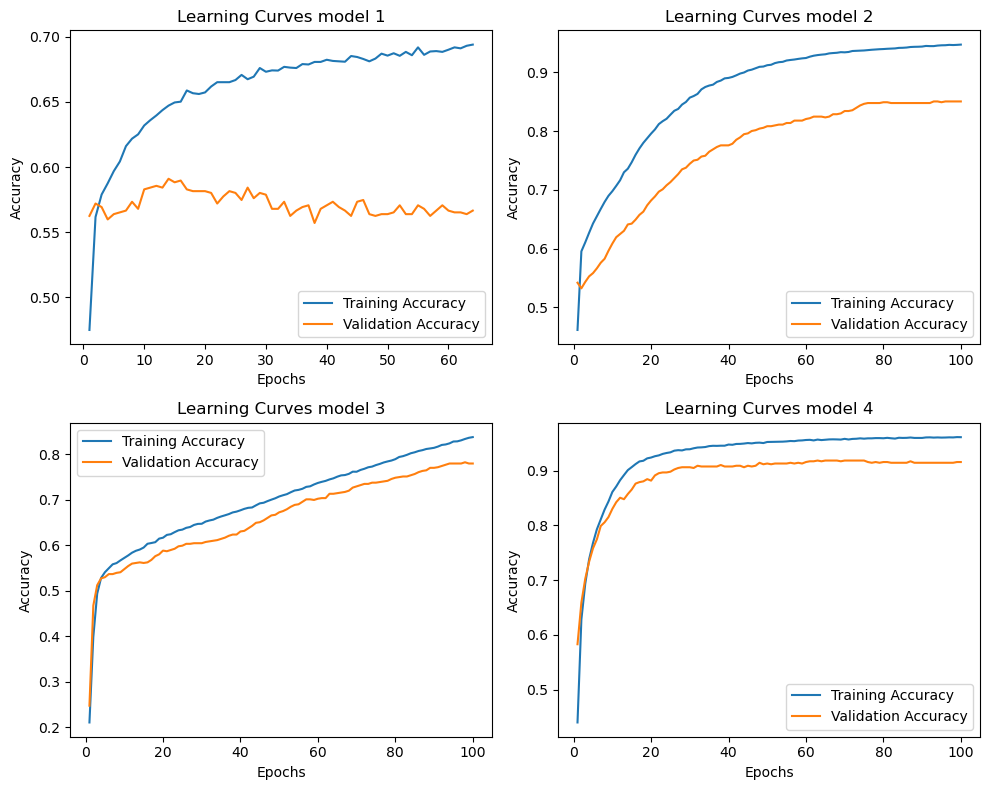

In [61]:
import matplotlib.pyplot as plt

# Access the training and validation errors from the history object
train_errors_1 = history_1.history['accuracy']
val_errors_1 = history_1.history['val_accuracy']
train_errors_2 = history_2.history['accuracy']
val_errors_2 = history_2.history['val_accuracy']
train_errors_3 = history_3.history['accuracy']
val_errors_3 = history_3.history['val_accuracy']
train_errors_4 = history_4.history['accuracy']
val_errors_4 = history_4.history['val_accuracy']




# Get the number of epochs
epochs_1 = range(1, len(train_errors_1) + 1)
epochs_2 = range(1, len(train_errors_2) + 1)
epochs_3 = range(1, len(train_errors_3) + 1)
epochs_4 = range(1, len(train_errors_4) + 1)

# Plotting the learning curves


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))


## MODELO 1 
ax1.plot(epochs_1, train_errors_1, label='Training Accuracy')
ax1.plot(epochs_1, val_errors_1, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Learning Curves model 1')
ax1.legend()

## MODELO 2
ax2.plot(epochs_2, train_errors_2, label='Training Accuracy')
ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Learning Curves model 2')
ax2.legend()

## MODELO 3
ax3.plot(epochs_3, train_errors_3, label='Training Accuracy')
ax3.plot(epochs_3, val_errors_3, label='Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.set_title('Learning Curves model 3')
ax3.legend()

## MODELO 4
ax4.plot(epochs_4, train_errors_4, label='Training Accuracy')
ax4.plot(epochs_4, val_errors_4, label='Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')
ax4.set_title('Learning Curves model 4')
ax4.legend()

# ax1.plot(epochs_2, train_errors_2, label='Training Accuracy model 2')
# ax1.plot(epochs_3, train_errors_3, label='Training Accuracy model 3')
# ax1.plot(epochs_4, train_errors_4, label='Training Accuracy model 4')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Accuracy')
# ax1.set_title('Learning Curves in Training set')
# ax1.legend()

# ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy model 2')
# ax2.plot(epochs_3, val_errors_3, label='Validation Accuracy model 3')
# ax2.plot(epochs_4, val_errors_4, label='Validation Accuracy model 4')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Accuracy')
# ax2.set_title('Learning Curves in Validation set')
# ax2.legend()



# Adding labels and title
plt.tight_layout()

# Displaying the plot
plt.show()

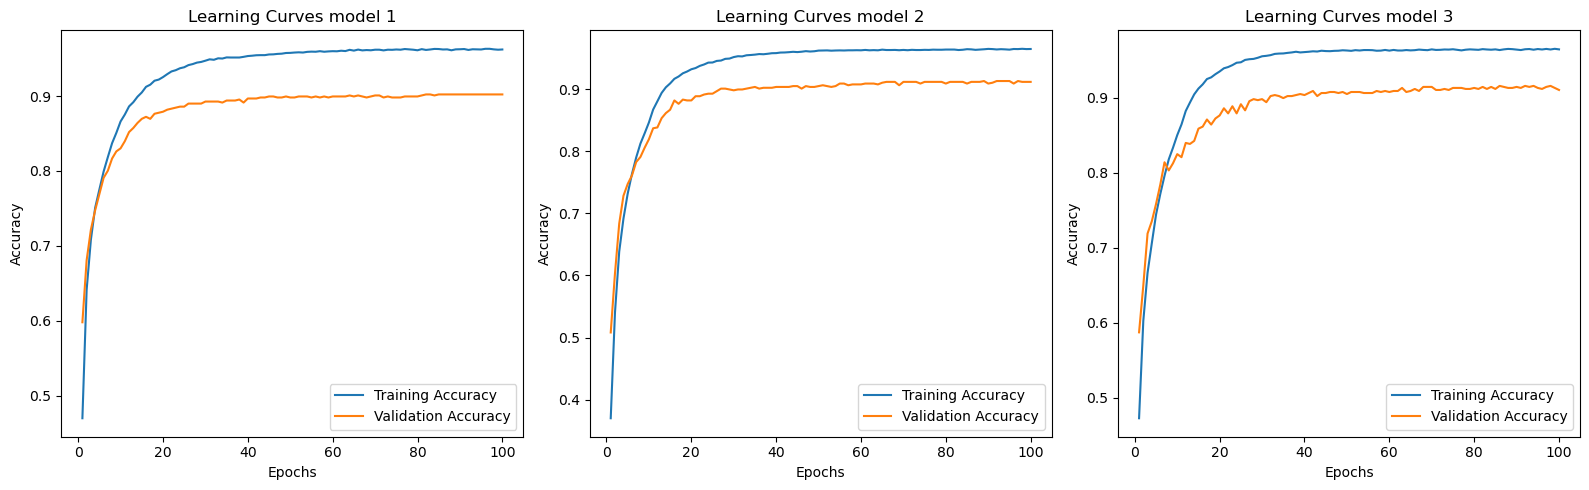

In [52]:

# Access the training and validation errors from the history object
train_errors_1 = new_history_1.history['accuracy']
val_errors_1 = new_history_1.history['val_accuracy']
train_errors_2 = new_history_2.history['accuracy']
val_errors_2 = new_history_2.history['val_accuracy']
train_errors_3 = new_history_3.history['accuracy']
val_errors_3 = new_history_3.history['val_accuracy']


# Get the number of epochs
epochs_1 = range(1, len(train_errors_1) + 1)
epochs_2 = range(1, len(train_errors_2) + 1)
epochs_3 = range(1, len(train_errors_3) + 1)

# Plotting the learning curves
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))


# Model 1
ax1.plot(epochs_1, train_errors_1, label='Training Accuracy')
ax1.plot(epochs_1, val_errors_1, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Learning Curves model 1')
ax1.legend()

# Model 2
ax2.plot(epochs_2, train_errors_2, label='Training Accuracy')
ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Learning Curves model 2')
ax2.legend()

# Model 3
ax3.plot(epochs_3, train_errors_3, label='Training Accuracy')
ax3.plot(epochs_3, val_errors_3, label='Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.set_title('Learning Curves model 3')
ax3.legend()


plt.tight_layout()

# plt.plot(epochs_1, train_errors_1, label='Training Accuracy')
# plt.plot(epochs_1, val_errors_1, label='Validation Accuracy')
# plt.plot(epochs_2, train_errors_2, label='Training Accuracy model 2')
# plt.plot(epochs_2, val_errors_2, label='Validation Accuracy model 2')
# plt.plot(epochs_3, train_errors_3, label='Training Accuracy model 3')
# plt.plot(epochs_3, val_errors_3, label='Validation Accuracy model 3')


# # Adding labels and title
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves')
# plt.legend()

# Displaying the plot
plt.show()

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

    La mejor red corresponde a la que cuenta con tres hidden layers y función de activación Relu, pues es la que cuenta el accuracy más alto en el conjunto de validación.

In [53]:
# ENtrentando new_model_3 con todos los datos de train y sin validation split

ANN_final = new_ANN_3.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    callbacks=[early_stop])

Epoch 1/100
 1/29 [>.............................] - ETA: 0s - loss: 0.0990 - categorical_accuracy: 0.9492 - accuracy: 0.9492

29/29 [==============================] - 0s 6ms/step - loss: 0.0944 - categorical_accuracy: 0.9597 - accuracy: 0.9597
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0918 - categorical_accuracy: 0.9608 - accuracy: 0.9608
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0908 - categorical_accuracy: 0.9615 - accuracy: 0.9615
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0897 - categorical_accuracy: 0.9625 - accuracy: 0.9625
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0887 - categorical_accuracy: 0.9621 - accuracy: 0.9621
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0883 - categorical_accuracy: 0.9626 - accuracy: 0.9626
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0874 - categorical_accuracy: 0.9638 - accuracy: 0.9638
Epoch 8/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0868 - categorical_accuracy

In [58]:
new_ANN_3.evaluate(x_test, y_test_OHE)

93/93 [==============================] - 0s 3ms/step - loss: 0.4461 - categorical_accuracy: 0.8846 - accuracy: 0.8846


[0.4460722506046295, 0.884628415107727, 0.884628415107727]

> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [55]:
y_pred = new_ANN_3(x_test) #Predicciones del modelo 3 a partir del conjunto de test
y_pred = np.argmax(y_pred, axis=1)

In [56]:
y_test_comp = np.argmax(y_test_OHE, axis=1) #Predicciones reales del conjunto de test a partir de y_test_OHE

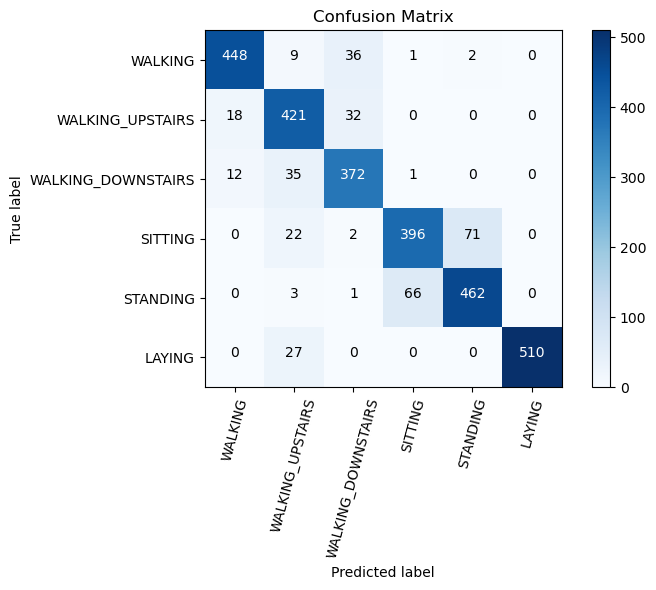

In [67]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

    asda


> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [ ]:
### Preprocesamiento de datos



In [ ]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [ ]:
ada.fit(x_train, y_train)

> f) Revise el error de validación con el conjunto de validaión.

In [ ]:
ada_errors = []

for ada_val_predict in ada.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))    

n_trees_ada = len(ada)

> g) Haga la misma prueba pero ahora con 30 estimadores

In [ ]:
...

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejor modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

> i) Muestre la matriz de confusión y comente sus resultados.

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

